In [2]:
from utils import plot

In [3]:
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import matplotlib.hatch
import matplotlib.pyplot as plt
import mplotutils as mpu
from matplotlib.path import Path
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [4]:
dir_input = '/work/mh0033/m301036/LSAT/Data/Regrid/'

data_CRUTEMP  = dir_input+'tas_CRUTEMP_regrid.nc'

In [5]:
#Using dateTime to select key period
tas_CRUTEMP = xr.open_dataset(data_CRUTEMP) 

# tas_CRUTEMP = tas_CRUTEMP.roll(lon=len(tas_CRUTEMP.lon)//2, roll_coords=True)
# tas_CRUTEMP['lon'] = np.where(tas_CRUTEMP['lon']> 180, tas_CRUTEMP['lon']-360, tas_CRUTEMP['lon'])

tas_CRUTEMP = tas_CRUTEMP.sel(time=slice('1900-01-01', '2014-12-31'))
tas_CRUTEMP['tas']=tas_CRUTEMP['tas']-273.15
tas_CRUTEMP['tas'].attrs['units']='degC'

In [6]:
tas_CRUTEMP_annual = tas_CRUTEMP['tas'].loc['1900-01-01':'2014-12-31',:,:]
tas_CRUTEMP_annual 

tas_CRUTEMP_ano  = tas_CRUTEMP_annual-tas_CRUTEMP_annual.mean()
tas_CRUTEMP_ano

<xarray.DataArray 'tas' (time: 1380, lat: 90, lon: 180)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[ 0.5083412,  0.5083412,  0.5083412, ...,  0.5083412,
          0.5083412,  0.5083412],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0

In [7]:
tas_CRUTEMP_annual_mean = tas_CRUTEMP_ano.groupby('time.year').mean('time')
tas_CRUTEMP_mean = tas_CRUTEMP_annual_mean.mean('year')
tas_CRUTEMP_mean.max()

<xarray.DataArray 'tas' ()>
array(0.77836561)

(<cartopy.mpl.geocollection.GeoQuadMesh at 0x7f48d1a45220>, None)

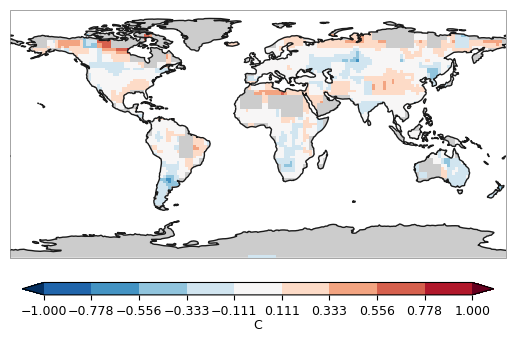

In [8]:
lat = tas_CRUTEMP.lat
lon = tas_CRUTEMP.lon

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
fig = plt.figure()  
proj = ccrs.PlateCarree()  #ccrs.Robinson()  
#proj = ccrs.Robinson()  
ax = fig.add_subplot(111, projection=proj)
levels = np.linspace(-1.0, 1.0, num=10)
plot.one_map(tas_CRUTEMP_annual_mean, ax, average='mean', dim= 'year', cmap="RdBu_r", levels=levels,  mask_ocean=True,  add_coastlines=True,  add_land=True,  plotfunc="pcolormesh", colorbar=True, getmean=True)
# plot.hatch_map(ax, p, 3 * ".", label="Lack of model agreement", invert=True, linewidth=0.25, color="0.1")